In [1]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("keras_Model.h5", compile=False)

# Load the labels
class_names = open("labels.txt", "r").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

In [3]:
# Replace this with the path to your image
def image_loader(path):
    image = Image.open(path).convert("RGB")
    plt.imshow(image, cmap='gray')
    return image

In [4]:
def predict_image(image):
    # resizing the image to be at least 224x224 and then cropping from the center
    size = (224, 224)
    image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)
    
    # turn the image into a numpy array
    image_array = np.asarray(image)
    
    # Normalize the image
    normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1
    
    # Load the image into the array
    data[0] = normalized_image_array
    
    # Predicts the model
    prediction = model.predict(data)
    index = np.argmax(prediction)
    class_name = class_names[index]
    confidence_score = prediction[0][index]
    
    # Print prediction and confidence score
    print("Class:", class_name[2:], end="")
    print("Confidence Score:", confidence_score)

1/1 [==============================] - 2s 2s/step
Class: headphone
Confidence Score: 0.7449812


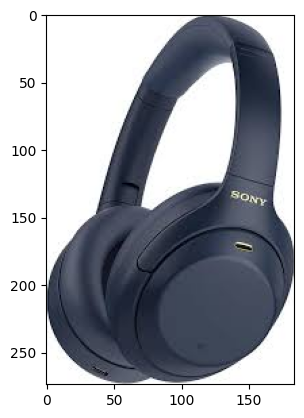

In [5]:
img = image_loader('headphone.jpeg')
predict_image(img)

1/1 [==============================] - 0s 135ms/step
Class: bluetooth speaker
Confidence Score: 0.4656802


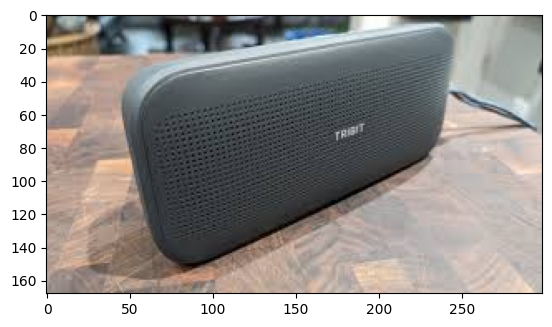

In [6]:
img = image_loader('bluetooth_speaker.jpeg')
predict_image(img)

1/1 [==============================] - 0s 84ms/step
Class: ps 5 controller
Confidence Score: 0.6361597


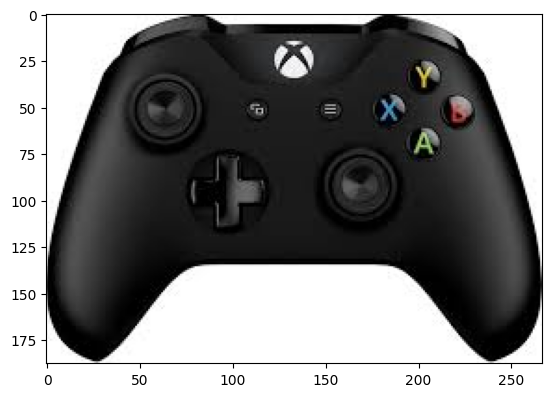

In [7]:
img = image_loader('xbox.jpeg')
predict_image(img)